# 🌍 Informe de Análisis del Clima en Ciudades del Mundo

## 1. 🔌 Conexión a la API

- Elige una **API de clima**.
- Obtén una **clave API** y pruébala realizando una petición a una sola ciudad.
- Solicita datos como:

  - **Nombre de la ciudad**
  - **Temperatura (°C)**
  - **Humedad (%)**
  - **Velocidad del viento** (m/s o km/h)
  - **Descripción del clima** (por ejemplo, “cielo despejado”)


In [50]:
import requests
import pandas as pd
import country_converter as coco
import matplotlib.pyplot as plt

API_KEY ="a9f821b9935854e146bbe7a6c8ef65b0"

url ="https://api.openweathermap.org/data/2.5/weather"

params ={
    "q": "A Coruña",
    "appid": API_KEY,
    "units": "metric", 
    "lang": "es"        
}

respuesta =requests.get(url, params=params)

data =respuesta.json()
    
weather_info = {
        "Ciudad": data['name'],
        "Temperatura": data['main']['temp'],
        "Humedad": data['main']['humidity'],
        "Velocidad Viento ": data['wind']['speed'],
        "Clima Descripcion": data['weather'][0]['description']
}
    
df =pd.DataFrame([weather_info]) 
print(df)


     Ciudad  Temperatura  Humedad  Velocidad Viento  Clima Descripcion
0  A Coruña        12.01       76               8.23       cielo claro


## 2. 📝 Recolección de Datos

- Crea una lista de al menos **20 ciudades** de diferentes continentes.  
- Usa un **bucle en Python** para solicitar los datos de cada ciudad y almacenar los resultados.  
- Construye un **DataFrame de pandas** con una fila por cada ciudad.


In [51]:
ciudades = [
    "A Coruña", "New York", "Tokyo", "Sydney", "Cairo",
    "Rio de Janeiro", "Moscow", "Cape Town", "Toronto", "Beijing",
    "Mumbai", "Buenos Aires", "Berlin", "Singapore", "Lagos",
    "Mexico City", "Seoul", "Istanbul", "Dubai", "Barcelona"
]
datos_ciudades = []
cc = coco.CountryConverter()

for ciudad in ciudades:
    params ={
    "q": ciudad,
    "appid": API_KEY,
    "units": "metric", 
    "lang": "es"        
    }

    respuesta =requests.get(url, params=params)

    data =respuesta.json()
        
    ciudades_info = {
        "Ciudad": data['name'],
        "Temperatura": data['main']['temp'],
        "Humedad": data['main']['humidity'],
        "Velocidad Viento": data['wind']['speed'],
        "Clima Descripcion": data['weather'][0]['description'],
        "Continente": cc.convert(data["sys"]["country"], to="continent")
}
    datos_ciudades.append(ciudades_info)
    


df = pd.DataFrame(datos_ciudades)
print(df)
    

            Ciudad  Temperatura  Humedad  Velocidad Viento Clima Descripcion  \
0         A Coruña        12.01       76              8.23       cielo claro   
1         New York         2.30       63              4.12       cielo claro   
2            Tokyo        16.83       69              3.09       cielo claro   
3           Sydney        17.21       51              6.69             nubes   
4            Cairo        22.42       46              3.60   nubes dispersas   
5   Rio de Janeiro        24.51       81              2.57       cielo claro   
6           Moscow         1.24       72              2.39             nubes   
7        Cape Town        25.91       45              9.26       cielo claro   
8          Toronto        -5.23       72             10.73       cielo claro   
9          Beijing        -0.06       21              1.40        muy nuboso   
10          Mumbai        31.99       23              3.60              humo   
11    Buenos Aires        17.76       91

## 3. 🧹 Limpieza de Datos
- Se revisaron los datos en busca de valores faltantes o inconsistentes (por ejemplo, solicitudes fallidas a la API).  
- Se aseguraron formatos correctos para las columnas numéricas.  
- La temperatura se convirtió a **grados Celsius** cuando fue necesario.  
- Los datos finales se guardaron en un archivo **CSV** para su análisis.

In [52]:
datos_ciudades = []
errores = 0
for ciudad in ciudades:
    params = {
        "q": ciudad,
        "appid": API_KEY,
        "units": "metric",
        "lang": "es"
    }

    respuesta = requests.get(url, params=params)
    
    if respuesta.status_code == 200:
        data = respuesta.json()
        ciudades_info = {
            "Ciudad": data.get('name', ciudad),
            "Temperatura": data['main'].get('temp', None),
            "Humedad": data['main'].get('humidity', None),
            "Velocidad Viento": data['wind'].get('speed', None),
            "Clima Descripcion": data['weather'][0].get('description', None),
            "Continente": cc.convert(data["sys"]["country"], to="continent")
        }
        datos_ciudades.append(ciudades_info)
    else:
        errores+=1
        print(f"Error en la carga de los datos de {ciudad} (status {respuesta.status_code})")

if errores == 0:
    print(f"No se ha registrado ningún error en las solicitudes de la API")


df = pd.DataFrame(datos_ciudades)
# Convertimos columnas a numéricos
df["Temperatura"] = pd.to_numeric(df["Temperatura"], errors='coerce')
df["Humedad"] = pd.to_numeric(df["Humedad"], errors='coerce')
df["Velocidad Viento"] = pd.to_numeric(df["Velocidad Viento"], errors='coerce')
print(df)

# Eliminar filas con datos críticos faltantes
df.dropna(subset=["Temperatura", "Humedad"], inplace=True)


#df.to_csv("datos_ciudades.csv", index=False, encoding='utf-8-sig')
    

No se ha registrado ningún error en las solicitudes de la API
            Ciudad  Temperatura  Humedad  Velocidad Viento Clima Descripcion  \
0         A Coruña        12.01       76              8.23       cielo claro   
1         New York         2.30       63              4.12       cielo claro   
2            Tokyo        16.83       69              3.09       cielo claro   
3           Sydney        17.21       51              6.69             nubes   
4            Cairo        22.42       46              3.60   nubes dispersas   
5   Rio de Janeiro        24.51       81              2.57       cielo claro   
6           Moscow         1.24       72              2.39             nubes   
7        Cape Town        25.91       45              9.26       cielo claro   
8          Toronto        -5.23       72             10.73       cielo claro   
9          Beijing        -0.06       21              1.40        muy nuboso   
10          Mumbai        31.99       23              3.60

 #### No he encontrado datos nulos en la API y los datos estas correctamente formateados a numéricos, de todas formas he añadido el código por posibles fallos futuros.

#### Se ha comentado la linea de creación del csv para que no intervenga con posibles aclaciones o respuestas de los próximos apartados

## 4. 📊 Análisis de Datos
Se respondieron preguntas clave:

- 🔥 **Ciudades más calientes y frías:** Se identificaron observando las temperaturas registradas por la API.  
- 💧 **Relación entre temperatura y humedad:** Se analizaron correlaciones entre estas variables.  
- 🌬 **Ciudades más ventosas por continente:** Se compararon las velocidades promedio del viento.  
- ☀️☁️🌧 **Descripción de clima más común:** Se identificó el tipo de clima más frecuente

In [53]:
import pandas as pd
import country_converter as coco

# Cargar datos limpios
df = pd.read_csv("datos_ciudades.csv")
print(df.columns.tolist())
# Top 10 ciudades más calientes
top10_calientes = df.sort_values("Temperatura", ascending=False).head(10)
print("Top 10 ciudades más calientes:")
print(top10_calientes[["Ciudad", "Temperatura"]].to_string(index=False))

# Top 10 ciudades más frías
top10_frias = df.sort_values("Temperatura").head(10)
print("\nTop 10 ciudades más frías:")
print(top10_frias[["Ciudad", "Temperatura"]].to_string(index=False))

# Top 10 ciudades más ventosas
top10_ventosas = df.sort_values("Velocidad Viento", ascending=False).head(10)
print("\nTop 10 ciudades más ventosas:")
print(top10_ventosas[["Ciudad", "Velocidad Viento"]].to_string(index=False))

# Top 10 tipos de clima más frecuentes
top10_climas = df["Clima Descripcion"].value_counts().head(10)
print("\nTop 10 tipos de clima más frecuentes:")
print(top10_climas.to_string())



# Top 10 ciudades más ventosas por continente
for continente in df["Continente"].unique():
    print(f"\n🌬 Top 10 ciudades más ventosas en {continente}:")
    top10 = df[df["Continente"] == continente].sort_values("Velocidad Viento", ascending=False).head(3)
    print(top10[["Ciudad", "Velocidad Viento"]].to_string(index=False))




['Ciudad', 'Temperatura', 'Humedad', 'Velocidad Viento', 'Clima Descripcion', 'Continente']
Top 10 ciudades más calientes:
        Ciudad  Temperatura
Rio de Janeiro        30.01
         Lagos        29.97
  Buenos Aires        28.24
        Mumbai        27.99
         Dubai        25.96
     Singapore        24.29
         Cairo        23.42
     Cape Town        21.81
        Sydney        20.72
      Istanbul        16.20

Top 10 ciudades más frías:
     Ciudad  Temperatura
      Seoul        -2.24
    Beijing        -2.06
    Toronto         1.00
     Moscow         3.18
   New York         4.27
     Berlin         6.68
      Tokyo        11.66
     Madrid        13.46
Mexico City        13.86
  Barcelona        14.87

Top 10 ciudades más ventosas:
        Ciudad  Velocidad Viento
       Toronto             15.20
      New York             11.32
         Tokyo              9.26
     Cape Town              8.23
     Barcelona              4.12
      Istanbul              4.12
Rio 

## 5. 📈 Visualización de Datos
Se generaron gráficos para apoyar el análisis:

- **Gráfico de barras:** temperatura promedio por continente 🌡📊  
- **Diagrama de dispersión:** temperatura vs humedad 💧🌡

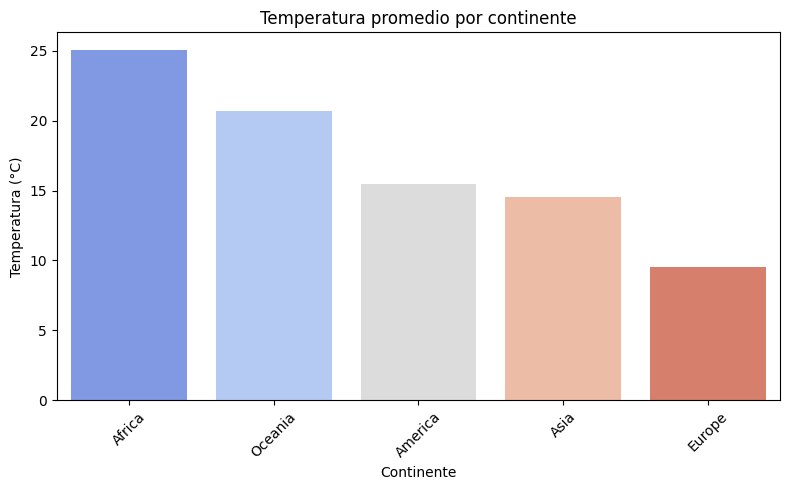

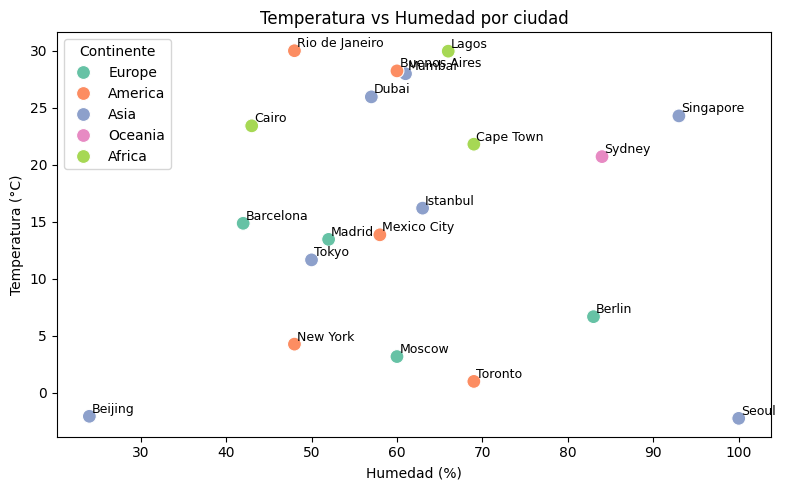

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

temp_promedio = df.groupby("Continente")["Temperatura"].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(
    x=temp_promedio.index,
    y=temp_promedio.values,
    hue=temp_promedio.index,
    palette="coolwarm",
    legend=False
)
plt.title("Temperatura promedio por continente")
plt.ylabel("Temperatura (°C)")
plt.xlabel("Continente")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Humedad", y="Temperatura", hue="Continente", palette="Set2", s=100)

for _, fila in df.iterrows():
    plt.text(
        fila["Humedad"] + 0.3,
        fila["Temperatura"] + 0.3,
        fila["Ciudad"],
        fontsize=9
    )

plt.title("Temperatura vs Humedad por ciudad")
plt.xlabel("Humedad (%)")
plt.ylabel("Temperatura (°C)")
plt.legend(title="Continente")
plt.tight_layout()
plt.show()


## 6. 📝 Resumen
- **Proceso:** Se recopilaron datos mediant a tiempo real a la API, obtuvimos información de la temperatura, pais, humedad, velocidad del viento y condiciones climáticas en general para diferentes ciudades. Posteriormente añadimos cada ciudad a su continente, se normalizaron los datos, y se realizó un análisis exploratorio como los gráficos del punto 6.  

### 📊 Patrones interesantes
Del análisis del dataset surgieron varios patrones destacables:

- **Diferencias térmicas entre continentes:**  
  Europa y Asia presentan temperaturas moderadas, mientras que África y Oceanía muestran valores más altos. América presenta una variabilidad más amplia.
  
- **Variación notable de la humedad:**  
  Las ciudades costeras o tropicales muestran una humedad elevada (como Sydney), mientras que zonas más secas presentan porcentajes menores (como Cairo).

- **Velocidad del viento irregular:**  
  Se observaron diferencias marcadas entre continentes, especialmente valores más altos en ciudades de América y Asia.

- **Relación entre variables:**  
  El gráfico de dispersión sugiere que la temperatura y la humedad no guardan una relación lineal fuerte. Sin embargo, se identifican agrupamientos interesantes según el continente.

### ⚠️ Dificultades o limitaciones
- **Muestra pequeña:**  
  El dataset incluye únicamente unas 20 ciudades, lo cual no refleja completamente la diversidad climática mundial.

- **Datos de un único instante:**  
  Las mediciones corresponden a un solo momento, por lo que no permiten estudiar tendencias temporales como estaciones o ciclos diarios, aunque esto se puede arreglar con los datos pronosticados o previos como por ejemplo en las tareas bonus.

- **Representación desigual de continentes:**  
  Algunas regiones están subrepresentadas, afectando la comparación entre ellas.


## Bonus

## 🌍 Comparación entre datos actuales y pronosticados

In [55]:
city = "A Coruña"

url_current = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={API_KEY}&units=metric&lang=es"
current = requests.get(url_current).json()

current_temp = current["main"]["temp"]
current_humidity = current["main"]["humidity"]
current_wind = current["wind"]["speed"]

url_forecast = f"https://api.openweathermap.org/data/2.5/forecast?q={city}&appid={API_KEY}&units=metric&lang=es"
forecast = requests.get(url_forecast).json()

# Convertimos a DataFrame
df_forecast = pd.json_normalize(forecast["list"])

df_forecast["dt"] = pd.to_datetime(df_forecast["dt"], unit='s')
df_forecast["hour"] = df_forecast["dt"].dt.hour

df_forecast["temp_diff"] = df_forecast["main.temp"] - current_temp

df_forecast_comparison = df_forecast[[
    "dt",
    "hour",
    "main.temp",
    "temp_diff",
    "main.humidity",
    "wind.speed"
]].rename(columns={
    "dt": "fecha_hora",
    "hour": "hora",
    "main.temp": "temperatura (°C)",
    "temp_diff": "diferencia_vs_actual (°C)",
    "main.humidity": "humedad (%)",
    "wind.speed": "viento (m/s)"
})

df_forecast_comparison["fecha_hora"] = df_forecast_comparison["fecha_hora"].dt.strftime("%d/%m/%Y %H:%M")
df_forecast_comparison["temperatura (°C)"] = df_forecast_comparison["temperatura (°C)"].round(1)
df_forecast_comparison["diferencia_vs_actual (°C)"] = df_forecast_comparison["diferencia_vs_actual (°C)"].round(1)
df_forecast_comparison["viento (m/s)"] = df_forecast_comparison["viento (m/s)"].round(1)

print("\n🔎 **Comparativa de la temperatura actual vs. pronóstico en A Coruña**")
print(df_forecast_comparison.head().to_string(index=False))

print(f"\n🌡️ Temperatura actual: {current_temp} °C")
print(f"💧 Humedad: {current_humidity} %")
print(f"💨 Viento: {current_wind} m/s")



🔎 **Comparativa de la temperatura actual vs. pronóstico en A Coruña**
      fecha_hora  hora  temperatura (°C)  diferencia_vs_actual (°C)  humedad (%)  viento (m/s)
01/12/2025 12:00    12              11.7                       -0.3           76           9.8
01/12/2025 15:00    15              12.0                        0.0           77          10.7
01/12/2025 18:00    18              11.4                       -0.6           86           5.2
01/12/2025 21:00    21               9.6                       -2.4           77           5.6
02/12/2025 00:00     0               9.1                       -2.9           75           4.7

🌡️ Temperatura actual: 12.01 °C
💧 Humedad: 76 %
💨 Viento: 8.23 m/s


## ⏱️ Cálculo de diferencias de temperatura por hora del día

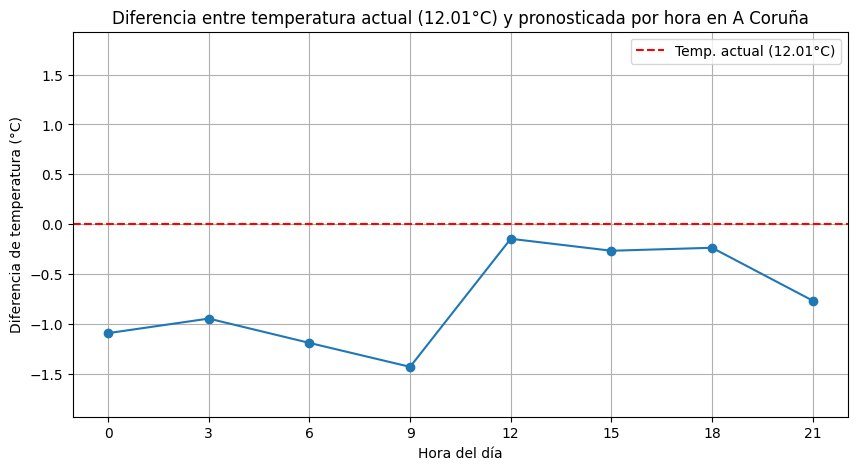

In [56]:
url_current = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={API_KEY}&units=metric&lang=es"
current = requests.get(url_current).json()
current_temp = current["main"]["temp"]

url_forecast = f"https://api.openweathermap.org/data/2.5/forecast?q={city}&appid={API_KEY}&units=metric&lang=es"
forecast = requests.get(url_forecast).json()

df_forecast = pd.json_normalize(forecast["list"])

df_forecast["dt"] = pd.to_datetime(df_forecast["dt"], unit="s")
df_forecast["hour"] = df_forecast["dt"].dt.hour

temp_diff_by_hour = df_forecast.groupby("hour")["main.temp"].mean() - current_temp

max_diff = temp_diff_by_hour.abs().max()

margin = 0.5
y_limit = max_diff + margin

plt.figure(figsize=(10,5))
plt.plot(temp_diff_by_hour.index, temp_diff_by_hour.values, marker='o', color='tab:blue')
plt.axhline(0, color='red', linestyle='--', label=f'Temp. actual ({current_temp}°C)') 
plt.ylim(-y_limit, y_limit) 

plt.xlabel("Hora del día")
plt.ylabel("Diferencia de temperatura (°C)")
plt.title(f"Diferencia entre temperatura actual ({current_temp}°C) y pronosticada por hora en {city}")
plt.grid(True)
plt.xticks(temp_diff_by_hour.index)
plt.legend() 
plt.show()

## 📍 Automatización de coordenadas con Geopy o lista de ciudades

In [57]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import time

geolocator = Nominatim(user_agent="weather_app")

def get_coords(city):
    try:
        location = geolocator.geocode(city, timeout=10)
        if location:
            return location.latitude, location.longitude
        return None
    except GeocoderTimedOut:
        return get_coords(city)

coords_dict = {}

for ciudad in ciudades:
    coords = get_coords(ciudad)

    if coords:
        coords_dict[ciudad] = coords
    else:
        coords_dict[ciudad] = "No encontrada"

    time.sleep(1)  

print(coords_dict)
      

{'A Coruña': (43.3709703, -8.3959425), 'New York': (40.7127281, -74.0060152), 'Tokyo': (35.6768601, 139.7638947), 'Sydney': (-33.8698439, 151.2082848), 'Cairo': (30.0443879, 31.2357257), 'Rio de Janeiro': (-22.9110137, -43.2093727), 'Moscow': (55.625578, 37.6063916), 'Cape Town': (-33.9288301, 18.4172197), 'Toronto': (43.6534817, -79.3839347), 'Beijing': (40.190632, 116.412144), 'Mumbai': (19.054999, 72.8692035), 'Buenos Aires': (-34.6095579, -58.3887904), 'Berlin': (52.5173885, 13.3951309), 'Singapore': (1.357107, 103.8194992), 'Lagos': (6.4550575, 3.3941795), 'Mexico City': (19.4326296, -99.1331785), 'Seoul': (37.5666791, 126.9782914), 'Istanbul': (41.006381, 28.9758715), 'Dubai': (25.0742823, 55.1885387), 'Barcelona': (41.3825802, 2.177073)}


## 🗺️ Mostrar resultados en un mapa mundial (Plotly o Folium)

In [58]:
import plotly.express as px

ciudades = list(coords_dict.keys())
latitudes = [coords_dict[ciudad][0] for ciudad in ciudades]
longitudes = [coords_dict[ciudad][1] for ciudad in ciudades]

# Creamos el mapa
fig = px.scatter_geo(
    lat=latitudes,
    lon=longitudes,
    text=ciudades,  # nombre de la ciudad
    projection="natural earth",  # proyección del mapa
    title="Ubicación de ciudades"
)

fig.show()